In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [32]:
amazon_feedback_raw = pd.read_csv("/Users/saurabh/Documents/sentimentLabelledSentences/amazon_cells_labelled.txt", delimiter= '\t', header=None)
amazon_feedback_raw.columns = ['message', 'feedback']
print(amazon_feedback_raw.head(125))

                                               message  feedback
0    So there is no way for me to plug it in here i...         0
1                          Good case, Excellent value.         1
2                               Great for the jawbone.         1
3    Tied to charger for conversations lasting more...         0
4                                    The mic is great.         1
5    I have to jiggle the plug to get it to line up...         0
6    If you have several dozen or several hundred c...         0
7          If you are Razr owner...you must have this!         1
8                  Needless to say, I wasted my money.         0
9                     What a waste of money and time!.         0
10                     And the sound quality is great.         1
11   He was very impressed when going from the orig...         1
12   If the two were seperated by a mere 5+ ft I st...         0
13                            Very good quality though         1
14   The design is very o

At the most obvious level, a feature from the message can be whether it contains a given word. Let's add those columns to our dataframe. The words chosen below are simply intuited as possibly having something to do with positive feedback. 

In [39]:
keywords = ['Good', 'Excellent', 'Great', 'impressed', 'Highly', 'recommend', 'SWEETEST', 'fine', 'Loved', 'free']

for key in keywords:
    amazon_feedback_raw[str(key)] = amazon_feedback_raw.message.str.contains(''+str(key)+'', case=False)

#print(feedback_raw)

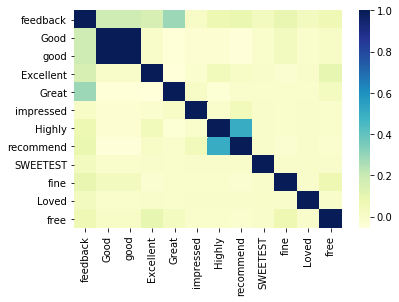

In [40]:
sns.heatmap(amazon_feedback_raw.corr(), cmap="YlGnBu")

That is actually a great looking plot for us. Most of the words show strong independence from each other. The only exceptions are highly:recommend and great:feedback. For now, let's keep everything in the dataset.

In [70]:
data = amazon_feedback_raw[keywords]
target = amazon_feedback_raw['feedback']

In [72]:
from sklearn.naive_bayes import GaussianNB

# Instantiate our model and store it in a new variable.
bnb = GaussianNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.

print("Number of mislabeled points out of total {} points:{}".format(data.shape[0], (target != y_pred).sum()))


Number of mislabeled points out of total 1000 points:364


The result above shows that accuracy is not that great but 

In [43]:
yelp_feedback_raw = pd.read_csv('/Users/saurabh/Documents/sentimentLabelledSentences/yelp_labelled.txt', delimiter= '\t', header=None)
yelp_feedback_raw.columns = ['message', 'feedback']
print(yelp_feedback_raw)

                                               message  feedback
0                             Wow... Loved this place.         1
1                                   Crust is not good.         0
2            Not tasty and the texture was just nasty.         0
3    Stopped by during the late May bank holiday of...         1
4    The selection on the menu was great and so wer...         1
5       Now I am getting angry and I want my damn pho.         0
6                Honeslty it didn't taste THAT fresh.)         0
7    The potatoes were like rubber and you could te...         0
8                            The fries were great too.         1
9                                       A great touch.         1
10                            Service was very prompt.         1
11                                  Would not go back.         0
12   The cashier had no care what so ever on what I...         0
13   I tried the Cape Cod ravoli, chicken,with cran...         1
14   I was disgusted beca

In [44]:
for key in keywords:
    yelp_feedback_raw[str(key)] = yelp_feedback_raw.message.str.contains(''+str(key)+'', case=False)

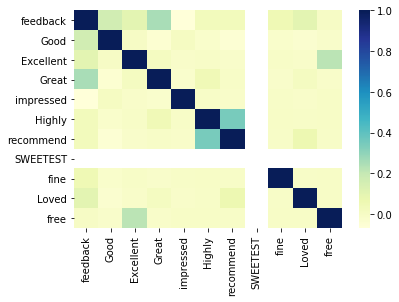

In [45]:
sns.heatmap(yelp_feedback_raw.corr(), cmap="YlGnBu")

In [76]:
data1 = yelp_feedback_raw[keywords]
target1 = yelp_feedback_raw['feedback']

In [80]:
from sklearn.naive_bayes import GaussianNB

# Instantiate our model and store it in a new variable.
bnb = GaussianNB()

# Fit our model to the data.
bnb.fit(data1, target1)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data1)

# Display our results.

print("Number of mislabeled points out of total {} points:{}".format(data1.shape[0], (target1 != y_pred).sum()))

Number of mislabeled points out of total 1000 points:415


In [81]:
imdb_feedback_raw = pd.read_csv('/Users/saurabh/Documents/sentimentLabelledSentences/imdb_labelled.txt', delimiter= '\t', header=None)
imdb_feedback_raw.columns = ['message', 'feedback']

In [10]:
print(imdb_feedback_raw)

                                               message  feedback
0    A very, very, very slow-moving, aimless movie ...         0
1    Not sure who was more lost - the flat characte...         0
2    Attempting artiness with black & white and cle...         0
3         Very little music or anything to speak of.           0
4    The best scene in the movie was when Gerardo i...         1
5    The rest of the movie lacks art, charm, meanin...         0
6                                  Wasted two hours.           0
7    Saw the movie today and thought it was a good ...         1
8                                 A bit predictable.           0
9    Loved the casting of Jimmy Buffet as the scien...         1
10                And those baby owls were adorable.           1
11   The movie showed a lot of Florida at it's best...         1
12   The Songs Were The Best And The Muppets Were S...         1
13                                   It Was So Cool.           1
14   This is a very "righ

In [82]:
for key in keywords:
    imdb_feedback_raw[str(key)] = imdb_feedback_raw.message.str.contains(''+str(key)+'', case=False)

In [83]:
print(imdb_feedback_raw)

                                               message  feedback   Good  \
0    A very, very, very slow-moving, aimless movie ...         0  False   
1    Not sure who was more lost - the flat characte...         0  False   
2    Attempting artiness with black & white and cle...         0  False   
3         Very little music or anything to speak of.           0  False   
4    The best scene in the movie was when Gerardo i...         1  False   
5    The rest of the movie lacks art, charm, meanin...         0  False   
6                                  Wasted two hours.           0  False   
7    Saw the movie today and thought it was a good ...         1   True   
8                                 A bit predictable.           0  False   
9    Loved the casting of Jimmy Buffet as the scien...         1  False   
10                And those baby owls were adorable.           1  False   
11   The movie showed a lot of Florida at it's best...         1  False   
12   The Songs Were The B

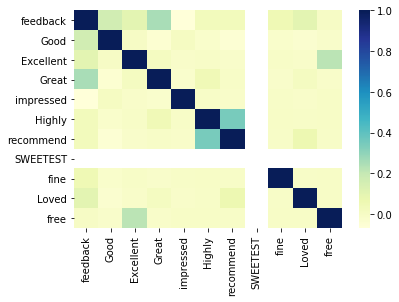

In [84]:
sns.heatmap(yelp_feedback_raw.corr(), cmap="YlGnBu")

In [86]:
data2 = imdb_feedback_raw[keywords]
target2 = imdb_feedback_raw['feedback']

In [91]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data2, target2)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data2)

# Display our results.

print("Number of mislabeled points out of total {} points:{}".format(data2.shape[0], (target2 != y_pred).sum()))

Number of mislabeled points out of total 748 points:325
